## Project breakdown and description

### 1. Problem definition

- What is the problem?
- I want to see what kind of work I tend to do more and what kind of work I avoid doing or do not manage to do completely. I have gathered for the past year (almost) daily todo lists that I would tick every night or the next day (so it is accurate). It could also give me an understanding of my development and habits.


- Why does the problem need to be solved?
- I would like to be able to see what areas in my life I excel at and what areas I need to put more work into. This project would help me see if I am headed into the right direction.


- How would I solve the problem?
- First of all I need a way to take all the data from paper and transcribe it into a file or a database. I would then need to follow along some pandas visualizations tutorials so I could have a good range of plots to work with (besides what I know now). Then I would start using pandas methods and other libraries to see the main characteristics of the data, how it fluctuated etc.

### 2. Preparing the data

Decide on a way to get the data from paper to computer. Decide how to represent the data in a meaningful way.

If present, deal with null values. Have your data consistent and clean. Make sure you have your data stored and also that you have an easy way to update it since daily to do lists will still be written.

### 3. Exploratory Data Analysis

1. Brainstorm what kind of statistics are important to be seen (numerically).
2. Store this data into some kind of text file or document.
3. Brainstorm what kind of statistics need to be plotted (see visually).
4. Create visuals and save them in a folder name after today's date. This way you can rerun this notebook at several points and compare your progress.


### 4. Conclusion

What have I learnt? What kind of insights did this project give me into my own schedule? What am I going to do with this information?
I would like to answer all these questions after finishing this project.

### Problem definition

Having the above 3 questions answered, we can confidently go and do the work. However, what I realized after actually beginning to work on the project is that the data is so complex, that right off the bat it had to be categorized.

For example, if in any given day I would want to work out or run, I would categorize it as work out. Or if I wanted to work for 8 hours in a day and in another only for 3, these 2 would be in the same category. I think it was the right call, because these "To do" lists are a desire to do something (anything) and so it matters if the thing was done or not. Of course categories are important, since analyzing what kind of tasks I am actually keen on doing will tell me what I need to change.

I wanted this project to test my skills for EDA, and it might be just that. I will however, after feature engineering, see if there is any variable that I would like to predict (such as what combination of tasks guarantee a high success of the day). For now I begin with the idea that this will be just an analysis project, and not a regression one.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2. Preparing the data

#### Extracting the data

As stated above, these "to do" lists are physical. They are bits of paper which I write (almost) every day in which I try to tell myself (most of) the things I want to accomplish during that day. Of course there are some things I do not write in there, but I do accomplish, so it is just a general guideline.

I have thought about many ways to extract the data from paper to computer and also how would I store it. Although trying to find/create a solution that reads writing off an image seemed interesting at first, I realized that I would probably spend more time tweaking it than actually doing the work myself. So that was that and I went on the (inglorious) task of transcribing my mental and physical whereabouts from paper to computer. It took me about 1 and a half days of actual uninterrupted work. 

The fact that I did this myself was also beneficial because I knew how to group these items into categories and it also forced me to reread all the data before I could analyze it. I think it also provided me with some insights and gave me ideas about what I would like to ask this data set, apart from my initial set of questions.

I used Google Sheets to write these entries because it was easy to use and at that point in time it seemed like the best solution timewise: categories as columns; if you have a new category, insert a new columns; for an item in an existing category just write the value on the corresponding row; always be able to see category names and reach the one you need easily (with 'hide rows' function of sheets).

#### Organizing data

Getting the right format of data was interesting to do, because I had to find a way to adequately get to the point I wanted to get: get a "success level" of the day, meaning:

$\frac{number-of-things-that-I-wanted-to-do-and-I-did}{number-of-things-that-I-wanted-to-do}$

This has led me to having columns where I write something like -x+y. This means that I wanted to do (x+y) things from that category, and I managed to do y, but I failed to do x.
This will be dealt with in the feature engineering part.

#### Updating data

For the scope of this project I have downloaded a version at 19th April 2022, but since these entries are now in a sheets file, it will be easy for me to update it weekly and rerun this project once every few months.

In [6]:
# Take a peak of what data actually looks like
df = pd.read_excel("data/initial_data/Daily to do list.xlsx", index_col='Date')    
df.head()

,Read for X hours,Read an article,Vacuum,Bed before X o'clock,Download an app,Download a movie,Read in the morning,Pay flat living costs,Enjoy your day,Call someone for X,...,Go out for administrative stuff,No sweets,Improv Related,DO X for work,Fix laptop,Prepare stuff to return to shop,Self-authoring,Build X,Write about the day,Write about the day before
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,-1.0,1.0,1.0,1.0,NaN,-1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-04,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05,-1.0,-1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-06,-1.0,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-07,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# See some statistics about the data; we will want to transform the data having the dtype object later on
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 2020-05-03 to 2022-04-19
Data columns (total 85 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Read for X hours                         144 non-null    float64
 1   Read an article                          69 non-null     object 
 2   Vacuum                                   112 non-null    float64
 3   Bed before X o'clock                     92 non-null     float64
 4   Download an app                          17 non-null     float64
 5   Download a movie                         7 non-null      float64
 6   Read in the morning                      1 non-null      float64
 7   Pay flat living costs                    33 non-null     float64
 8   Enjoy your day                           7 non-null      float64
 9   Call someone for X                       145 non-null    object 
 10  Work out                       

It seems right that we have a lot of null values. Different days have different goals and so it seems very appropriate that the data is so sparsely spread. We can go ahead and replace null values with 0, since we will only need strictly negative and strictly positive values for our analysis. This way we know that 0 is a value to ignore, but at the same time, we do not have to deal with null values.

Besides this, we can also check what kind of values we have for the columns with dtype object.

In [4]:
for col in df.columns:
    df[col] = df[col].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 2020-05-03 to 2022-04-19
Data columns (total 85 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Read for X hours                         484 non-null    float64
 1   Read an article                          484 non-null    object 
 2   Vacuum                                   484 non-null    float64
 3   Bed before X o'clock                     484 non-null    float64
 4   Download an app                          484 non-null    float64
 5   Download a movie                         484 non-null    float64
 6   Read in the morning                      484 non-null    float64
 7   Pay flat living costs                    484 non-null    float64
 8   Enjoy your day                           484 non-null    float64
 9   Call someone for X                       484 non-null    object 
 10  Work out                       

In [5]:
object_df = df.select_dtypes(include=['object'])
for col in object_df.columns:
    print("{} : {}".format(col, object_df[col].unique()))

Read an article : [1.0 0 -1.0 '-1+1' -2.0 '-1+2' -3.0]
Call someone for X : [0 -1.0 1.0 -2.0 2.0 -3.0 '-3+1' '-1+2' '-1+1' '-2+1' '-2+3' '-1+5' 3.0]
Work out : [0 -1.0 1.0 2.0 '-1+1']
Buy stuff online : [0 1.0 -1.0 2.0 -2.0 '-1+1']
Psychology work : [-1.0 1.0 0 '-1+1']
Online payments : [0 -1.0 1.0 -2.0 2.0 '-1+1']
Work for X hours : [0 -1.0 1.0 -2.0 '-1+1' '-2+1' -3.0 '-1+2' 2.0]
Go to the shop : [0 1.0 -1.0 -2.0 '-1+1' 2.0]
Update goals : [0 -1.0 1.0 '-1+1']
Limit phone usage : [0 -1.0 1.0 '-1+1']
Clean house : [0 1.0 -1.0 '-3+1' -2.0 '-1+1']
Holiday related : [0 -1.0 -2.0 1.0 2.0 '-1+1']
Do not forget X : [0 1.0 -1.0 3.0 4.0 2.0 '-1+1']
Brainstorm idea for X : [0 1.0 -1.0 -4.0 -8.0 -2.0 '-1+2']
DO X for work : [0 -1.0 '-1+1' 1.0 2.0 -2.0 '-2+1' '-2+2']


### 3. Exploratory Data Analysis

#### Brainstorm what kind of statistics are important to be seen (numerically)

What kind of numerical insights I would like:

- tasks with most probability to fail
- tasks with most probability to succeed
- tasks with most more than 3 days consecutive failures
- number of days in which task list was created per month-year
- descriptive statistics about day success (IQR, median etc.)
- total success rate per each category
- tasks that come up the most in these lists (done or not)
- productivity rates per month/year
- whatever else I come up with after feature engineering

#### Brainstorm what kind of statistics need to be plotted (see visually)

- productivity rates in time
- specific univariate plots (for variables that I deem important) to see evolution in time
- heatmap for numerical values (see if any of them correlates with any other); specifically for this I do not see a way in which we can include in this analysis entries that have negative and positive values in the same day
- pair plots for most important variables
- number of tasks per day
- plot success rate against number of tasks
- define categories: quick, get_out_of_house, cleaning, work, physical, reading, mentality_of_day, talk_to_people and for each plot boxplots with success rate to see which activities you are most likely to do
- other plots that will be relevant after feature engineering


###### To check: how many "object" entries we have and if we can remove these rows (after computing success rates) or if we can find another way of dealing with this

Let's see how many rows with this property there are and if for these 15 columns we can split each one into pos_ + column_name and neg_ + column_name, where pos_ + column_name will contain entries where the task was done successfully, and neg_ +column_name will contain entries where the task was not done. This will mean that we will have a total of 100 columns, all of them float typed. We can convert it to integers to consume less space as well.

In [6]:
for col in object_df.columns:
    print(object_df[col].value_counts())

0       415
-1.0     36
1.0      20
-2.0      5
-1+1      4
-1+2      3
-3.0      1
Name: Read an article, dtype: int64
0       339
-1.0     62
1.0      44
-2.0     12
2.0      11
-1+1      6
-2+1      3
-3.0      2
-3+1      1
-1+2      1
-2+3      1
-1+5      1
3.0       1
Name: Call someone for X, dtype: int64
0       161
-1.0    161
1.0     160
2.0       1
-1+1      1
Name: Work out, dtype: int64
0       415
-1.0     47
1.0      18
2.0       2
-2.0      1
-1+1      1
Name: Buy stuff online, dtype: int64
0       469
-1.0      9
1.0       5
-1+1      1
Name: Psychology work, dtype: int64
0       435
1.0      27
-1.0     12
-2.0      4
2.0       3
-1+1      3
Name: Online payments, dtype: int64
0       321
-1.0    120
1.0      21
-1+1      6
-2+1      6
-3.0      4
-2.0      3
-1+2      2
2.0       1
Name: Work for X hours, dtype: int64
0       351
1.0      77
-1.0     52
-1+1      2
-2.0      1
2.0       1
Name: Go to the shop, dtype: int64
0       427
-1.0     45
1.0      10
-1+1   

In [7]:
# There are around 66 such entries, having both done and undone tasks. 
# Our best bet is to create negative and positive columns out of these columns.
def split_column_positive_negative(dataframe, column_name):
    positive_column_name = "Finished " + column_name
    negative_column_name = "Unfinished " + column_name
    dataframe[positive_column_name] = 0
    dataframe[negative_column_name] = 0
    for index, row in dataframe.iterrows():
        if isinstance(row[column_name], (int, float)):
            actual_value = int(row[column_name])
            # Only modify entries that are positive or negative
            if actual_value < 0:
                dataframe.loc[index, negative_column_name] = actual_value
            elif actual_value > 0:
                dataframe.loc[index, positive_column_name] = actual_value
        # If the value is not an integer, then it has the form '-negative_value+positive_value'
        else:
            split_values = row[column_name].split('+')
            negative_value = int(split_values[0])
            positive_value = int(split_values[1])
            dataframe.loc[index, negative_column_name] = negative_value
            dataframe.loc[index, positive_column_name] = positive_value
            
    dataframe.drop(columns=[column_name], inplace=True)

In [8]:
df

,Read for X hours,Read an article,Vacuum,Bed before X o'clock,Download an app,Download a movie,Read in the morning,Pay flat living costs,Enjoy your day,Call someone for X,...,Go out for administrative stuff,No sweets,Improv Related,DO X for work,Fix laptop,Prepare stuff to return to shop,Self-authoring,Build X,Write about the day,Write about the day before
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,-1.0,1.0,1.0,1.0,0.0,-1.0,1.0,0.0,0.0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-04,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-1.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-05,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-06,-1.0,0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-07,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,0.0,0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,-1.0
2022-04-14,0.0,0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,1.0
2022-04-15,0.0,0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,1.0


In [9]:
# df is too general of a name; let's rename the variable tasks_per_day
tasks_per_day = df.copy()

In [10]:
for col in object_df:
    split_column_positive_negative(tasks_per_day, col)

tasks_per_day

,Read for X hours,Vacuum,Bed before X o'clock,Download an app,Download a movie,Read in the morning,Pay flat living costs,Enjoy your day,Dinner with a friend,No computer games,...,Finished Clean house,Unfinished Clean house,Finished Holiday related,Unfinished Holiday related,Finished Do not forget X,Unfinished Do not forget X,Finished Brainstorm idea for X,Unfinished Brainstorm idea for X,Finished DO X for work,Unfinished DO X for work
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,-1.0,1.0,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-05-04,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-05-05,-1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-05-06,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
2020-05-07,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,-1,0,0,2,0,0,0,0,0
2022-04-14,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2022-04-15,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,-1,0,0,0,0


In [11]:
# We want now to compute the productivity of a certain day. 
# Now we know that all our data is a non null integer, so let's cast it as such.
for col in tasks_per_day.columns:
    tasks_per_day[col] = tasks_per_day[col].astype(int)
    
tasks_per_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 2020-05-03 to 2022-04-19
Data columns (total 100 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Read for X hours                         484 non-null    int32
 1   Vacuum                                   484 non-null    int32
 2   Bed before X o'clock                     484 non-null    int32
 3   Download an app                          484 non-null    int32
 4   Download a movie                         484 non-null    int32
 5   Read in the morning                      484 non-null    int32
 6   Pay flat living costs                    484 non-null    int32
 7   Enjoy your day                           484 non-null    int32
 8   Dinner with a friend                     484 non-null    int32
 9   No computer games                        484 non-null    int32
 10  Be more mindfully productive             484 non-null 

In [12]:
# Check for no rows with all values 0
tasks_per_day[(tasks_per_day==0).all(axis=1)]

,Read for X hours,Vacuum,Bed before X o'clock,Download an app,Download a movie,Read in the morning,Pay flat living costs,Enjoy your day,Dinner with a friend,No computer games,...,Finished Clean house,Unfinished Clean house,Finished Holiday related,Unfinished Holiday related,Finished Do not forget X,Unfinished Do not forget X,Finished Brainstorm idea for X,Unfinished Brainstorm idea for X,Finished DO X for work,Unfinished DO X for work
Date,,,,,,,,,,,,,,,,,,,,,


In [13]:
# Compute the productivity of each day
tasks_per_day['Productivity'] = 0

for index, row in tasks_per_day.iterrows():
    negative_sum = 0
    positive_sum = 0
    for col in tasks_per_day.columns:
        if row[col] < 0:
            negative_sum += row[col]
        elif row[col] > 0:
            positive_sum += row[col]
    # Number of things done / number of total things that should have been done
    tasks_per_day.loc[index, 'Productivity'] = positive_sum / (positive_sum - negative_sum)

tasks_per_day

,Read for X hours,Vacuum,Bed before X o'clock,Download an app,Download a movie,Read in the morning,Pay flat living costs,Enjoy your day,Dinner with a friend,No computer games,...,Unfinished Clean house,Finished Holiday related,Unfinished Holiday related,Finished Do not forget X,Unfinished Do not forget X,Finished Brainstorm idea for X,Unfinished Brainstorm idea for X,Finished DO X for work,Unfinished DO X for work,Productivity
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,-1,1,1,0,-1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.571429
2020-05-04,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.833333
2020-05-05,-1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.666667
2020-05-06,-1,0,-1,1,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0.285714
2020-05-07,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,0,0,-1,0,0,0,0,0,0,0,...,-1,0,0,2,0,0,0,0,0,0.333333
2022-04-14,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.500000
2022-04-15,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,1,-1,0,0,0,0,0.538462


In [14]:
# Create dataframe which tell us about the amount of work done per category

category_productivity = pd.DataFrame([], index=df.columns)
category_productivity['Total Unfinished'] = 0
category_productivity['Total Finished'] = 0

category_productivity

,Total Unfinished,Total Finished
Read for X hours,0,0
Read an article,0,0
Vacuum,0,0
Bed before X o'clock,0,0
Download an app,0,0
...,...,...
Prepare stuff to return to shop,0,0
Self-authoring,0,0
Build X,0,0
Write about the day,0,0


In [15]:
for column_name in object_df.columns:
    positive_column_name = "Finished " + column_name
    negative_column_name = "Unfinished " + column_name
    category_productivity.loc[column_name, 'Total Unfinished'] = -tasks_per_day[negative_column_name].sum()
    category_productivity.loc[column_name, 'Total Finished'] = tasks_per_day[positive_column_name].sum()

for col in np.setdiff1d(df.columns.values, object_df.columns.values):
    negative_sum = tasks_per_day.loc[tasks_per_day[col] < 0][col].sum()
    positive_sum = tasks_per_day.loc[tasks_per_day[col] > 0][col].sum()
    category_productivity.loc[col, 'Total Unfinished'] = -negative_sum
    category_productivity.loc[col, 'Total Finished'] = positive_sum
    
category_productivity['Productivity percent'] = category_productivity['Total Finished'] / (category_productivity['Total Finished'] + category_productivity['Total Unfinished'])

category_productivity

,Total Unfinished,Total Finished,Productivity percent
Read for X hours,121,23,0.159722
Read an article,56,30,0.348837
Vacuum,38,74,0.660714
Bed before X o'clock,78,14,0.152174
Download an app,10,7,0.411765
...,...,...,...
Prepare stuff to return to shop,17,5,0.227273
Self-authoring,8,2,0.200000
Build X,3,4,0.571429
Write about the day,94,37,0.282443


We now have 2 data frames that can tell us about productivity per days and productivity per categories. Now we can begin the data exploration. We will follow the points we have set above and if fit, we can extract other statistics as well.

Without further ado, let's investigate some numbers.

In [3]:
from datetime import date
import os
import dataframe_image as dfi

# Set up a data folder if it does not exist
data_folder = "data"
try: 
    os.mkdir(data_folder) 
except OSError as error: 
    print(error) 


# Set up a folder with today's date as name so we can store everything in it
today_date = date.today().strftime("%d-%b-%y")
today_date

# Create folder if it does not exist
try: 
    os.mkdir(data_folder + "/" + today_date) 
except OSError as error: 
    print(error)
    
# Define folder name in which we save all data for the session
folder_name = data_folder + "/" + today_date

In [17]:
# Tasks with most probability to fail
tasks_which_fail = category_productivity.sort_values(by='Productivity percent').head(15)
dfi.export(tasks_which_fail, folder_name + "\TasksWhichFail.png")
tasks_which_fail

,Total Unfinished,Total Finished,Productivity percent
Update CV,6,0,0.000000
Watch a movie,5,0,0.000000
Fix laptop,1,0,0.000000
Learn for sax,23,3,0.115385
Bed before X o'clock,78,14,0.152174
Read for X hours,121,23,0.159722
Work for X hours,158,39,0.197970
Self-authoring,8,2,0.200000
Download/Upload from phone,12,3,0.200000
Fix clothes storage,4,1,0.200000


In [18]:
# Tasks with most probability to succeed
tasks_which_succeed = category_productivity.sort_values(by='Productivity percent', ascending=False).head(15)
dfi.export(tasks_which_succeed, folder_name + "\TasksWhichSucceed.png")
tasks_which_succeed

,Total Unfinished,Total Finished,Productivity percent
Read in the morning,0,1,1.000000
Enjoy your day,0,7,1.000000
Unfreeze chicken,1,6,0.857143
Dinner with a friend,1,6,0.857143
Go to the ATM,2,12,0.857143
Download a movie,1,6,0.857143
Send water index,2,10,0.833333
Nails,3,11,0.785714
Romantic life,12,33,0.733333
Write about the day before,23,60,0.722892


In [19]:
# Distribution of task productivities
productivity_distribution = pd.DataFrame(category_productivity['Productivity percent'].describe())
dfi.export(productivity_distribution, folder_name + "\ProductivityDistribution.png")
productivity_distribution

,Productivity percent
count,85.000000
mean,0.468217
std,0.220079
min,0.000000
25%,0.333333
50%,0.444444
75%,0.610169
max,1.000000


In [20]:
# Number of days in which task list was created per month-year
task_days = pd.DataFrame(tasks_per_day.reset_index()['Date'])
task_days["Month"] = task_days["Date"].dt.strftime("%B")
task_days["Year"] = task_days["Date"].dt.year

tasks_per_month_year = task_days.groupby(by=["Year", "Month"]).count()
dfi.export(tasks_per_month_year, folder_name + "\DaysWithTasksPerMonthYear.png")
tasks_per_month_year

Date
Year Month          
2020 August       22
     December     19
     July         28
     June         29
     May          28
     November     19
     October      19
     September    20
2021 April        21
     August       22
     December     18
     February     22
     January      25
     July         10
     June          7
     March        18
     May          14
     November     20
     October      20
     September    16
2022 April        14
     February     21
     January      24
     March        28

In [21]:
# Descriptive statistics about day success (IQR, median etc.)
days_success_distribution = pd.DataFrame(tasks_per_day['Productivity'].describe())
dfi.export(days_success_distribution, folder_name + "\DaysSuccessDistribution.png")
days_success_distribution

,Productivity
count,484.000000
mean,0.447260
std,0.249662
min,0.000000
25%,0.272727
50%,0.444444
75%,0.625000
max,1.000000


In [22]:
# Total success rate per each category
category_productivity['Productivity percent'].sort_values().to_json(folder_name + "\TotalSuccessRates.json", orient='index', indent=4)
category_productivity["Productivity percent"]

Read for X hours                   0.159722
Read an article                    0.348837
Vacuum                             0.660714
Bed before X o'clock               0.152174
Download an app                    0.411765
                                     ...   
Prepare stuff to return to shop    0.227273
Self-authoring                     0.200000
Build X                            0.571429
Write about the day                0.282443
Write about the day before         0.722892
Name: Productivity percent, Length: 85, dtype: float64

In [23]:
# Tasks that come up the most in these lists (done or not)
tasks_number = category_productivity['Total Finished'] + category_productivity['Total Unfinished']
tasks_number = pd.DataFrame(tasks_number.sort_values(ascending=False).head(20))
dfi.export(tasks_number, folder_name + "\CountsOfMostPopularTasks.png")

tasks_number

,0
Work out,325
Call someone for X,200
Work for X hours,197
Wash clothes,156
Read for X hours,144
Dishes,143
Go to the shop,137
Cook food,132
Write about the day,131
DO X for work,129


In [24]:
tasks_per_day

,Read for X hours,Vacuum,Bed before X o'clock,Download an app,Download a movie,Read in the morning,Pay flat living costs,Enjoy your day,Dinner with a friend,No computer games,...,Unfinished Clean house,Finished Holiday related,Unfinished Holiday related,Finished Do not forget X,Unfinished Do not forget X,Finished Brainstorm idea for X,Unfinished Brainstorm idea for X,Finished DO X for work,Unfinished DO X for work,Productivity
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,-1,1,1,0,-1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.571429
2020-05-04,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.833333
2020-05-05,-1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.666667
2020-05-06,-1,0,-1,1,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0.285714
2020-05-07,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,0,0,-1,0,0,0,0,0,0,0,...,-1,0,0,2,0,0,0,0,0,0.333333
2022-04-14,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.500000
2022-04-15,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,1,-1,0,0,0,0,0.538462


In [25]:
# Productivity per month per year
productivty_per_month_year = pd.concat([task_days, tasks_per_day['Productivity'].reset_index()], axis=1)[['Month', 'Year', "Productivity"]]
productivty_per_month_year = pd.DataFrame(productivty_per_month_year.groupby(["Year", "Month"]).mean())
dfi.export(productivty_per_month_year, folder_name + "\ProductivityPerMonthPerYear.png")

productivty_per_month_year

Productivity
Year Month                  
2020 August         0.450397
     December       0.406381
     July           0.386880
     June           0.493350
     May            0.479518
     November       0.428753
     October        0.444925
     September      0.488234
2021 April          0.381364
     August         0.559893
     December       0.491300
     February       0.423142
     January        0.459586
     July           0.454167
     June           0.431999
     March          0.320996
     May            0.447757
     November       0.569809
     October        0.526122
     September      0.526190
2022 April          0.496893
     February       0.356765
     January        0.372437
     March          0.378845

These were the numerical insights. All the information are stored in the folder having the name of the day when this notebook was run. Now we can go ahead and check out some graphs and save them.

<AxesSubplot:xlabel='Date'>

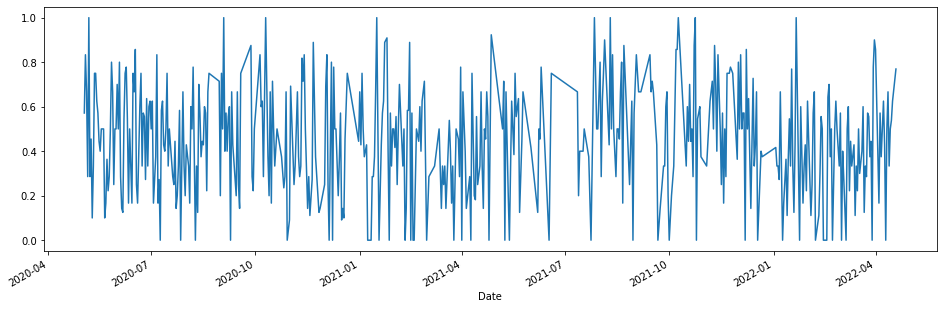

In [26]:
# Productivity rates in time
plt.figure(figsize=(16, 5))

tasks_per_day['Productivity'].plot()

# Since it does not seem to give any insight, I shall not save this image, but it is good that we have seen it.

<AxesSubplot:ylabel='Productivity'>

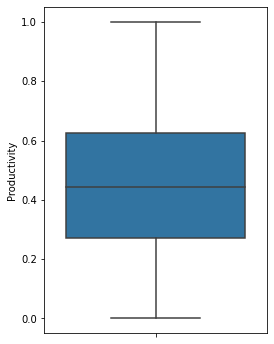

In [27]:
# Spread of productivities
plt.figure(figsize=(4, 6))
sns.boxplot(y=tasks_per_day['Productivity'])

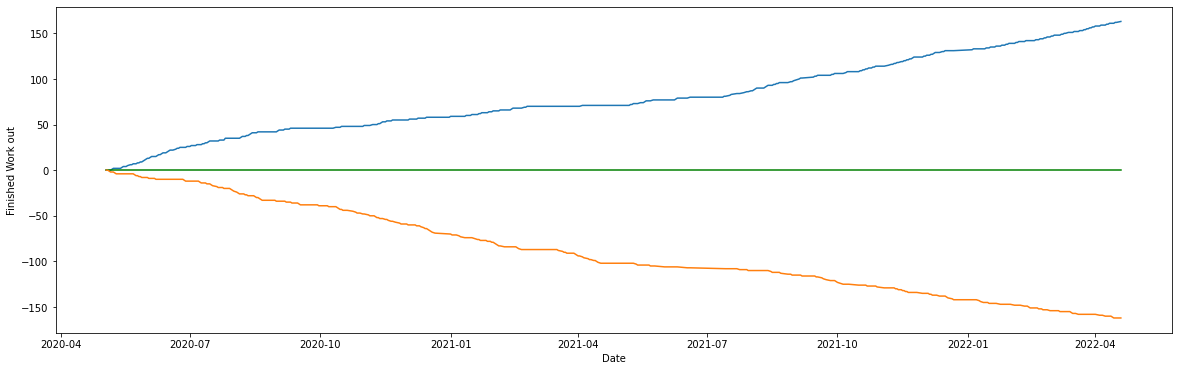

In [28]:
# Specific univariate plots (for variables that I deem important) to see evolution in time
# What I would like to see is some graphs about work out, reading, calling parents, cooking and saxophone
plt.figure(figsize=(20, 6))

tasks_per_day_for_graphs = tasks_per_day.reset_index()
sns.lineplot(x = tasks_per_day_for_graphs['Date'], y = tasks_per_day_for_graphs['Finished Work out'].cumsum(), legend='auto')
plt.plot(tasks_per_day_for_graphs['Date'], [0] * tasks_per_day_for_graphs.shape[0], color='green')
sns.lineplot(x = tasks_per_day_for_graphs['Date'], y = tasks_per_day_for_graphs['Unfinished Work out'].cumsum(), legend='auto')

plt.savefig(folder_name + "\WorkoutFinishedVsUnfinishedInTime.png", bbox_inches='tight')

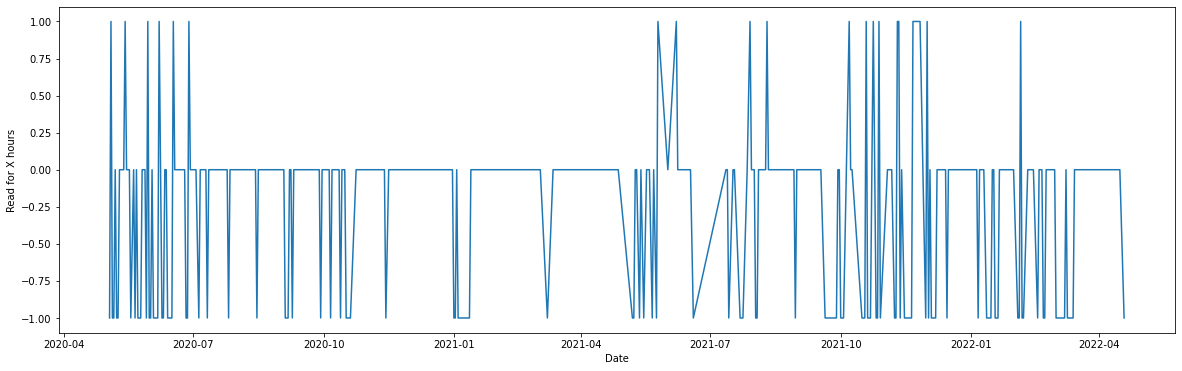

In [29]:
# Plot for reading
plt.figure(figsize=(20, 6))
sns.lineplot(x = tasks_per_day_for_graphs['Date'], y = tasks_per_day_for_graphs['Read for X hours'])

plt.savefig(folder_name + "\ReadingInTime.png", bbox_inches='tight')

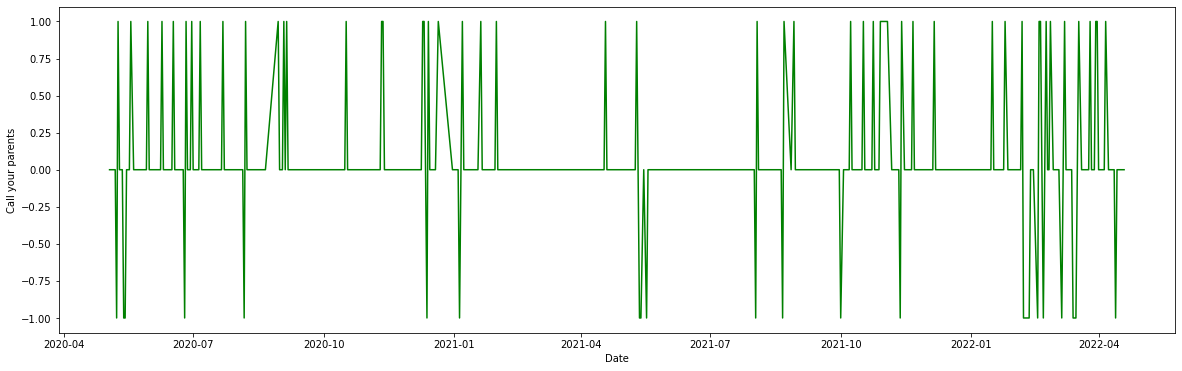

In [30]:
# Plot for calling parents
plt.figure(figsize=(20, 6))
sns.lineplot(x = tasks_per_day_for_graphs['Date'], y = tasks_per_day_for_graphs['Call your parents'], color="green")

plt.savefig(folder_name + "\CallingParentsInTime.png", bbox_inches='tight')

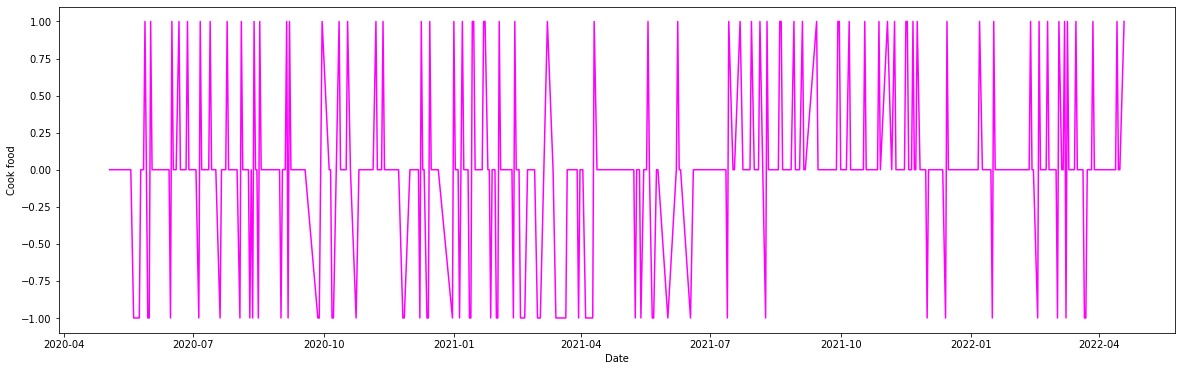

In [31]:
# Plot for cooking
plt.figure(figsize=(20, 6))
sns.lineplot(x = tasks_per_day_for_graphs['Date'], y = tasks_per_day_for_graphs['Cook food'], color="magenta")

plt.savefig(folder_name + "\CookingInTime.png", bbox_inches='tight')

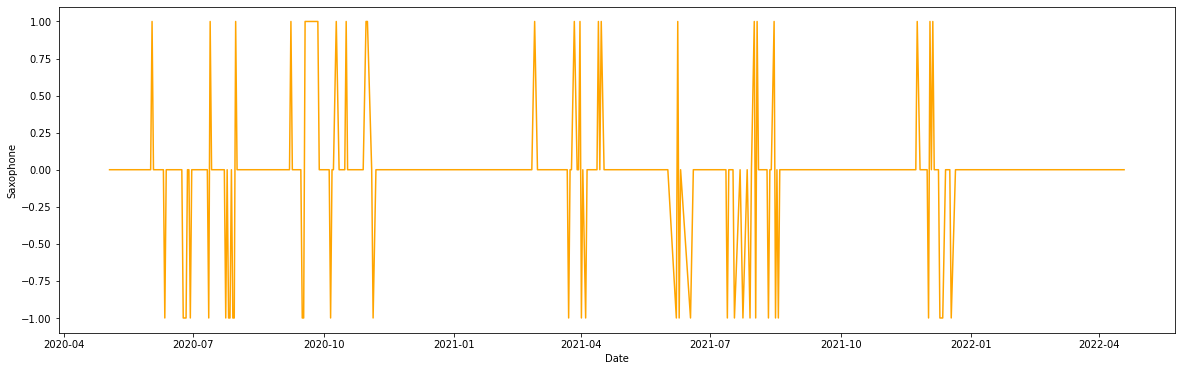

In [32]:
# Plot for saxophone
plt.figure(figsize=(20, 6))
sns.lineplot(x = tasks_per_day_for_graphs['Date'], y = tasks_per_day_for_graphs['Saxophone'], color="orange")

plt.savefig(folder_name + "\SaxophoneInTime.png", bbox_inches='tight')

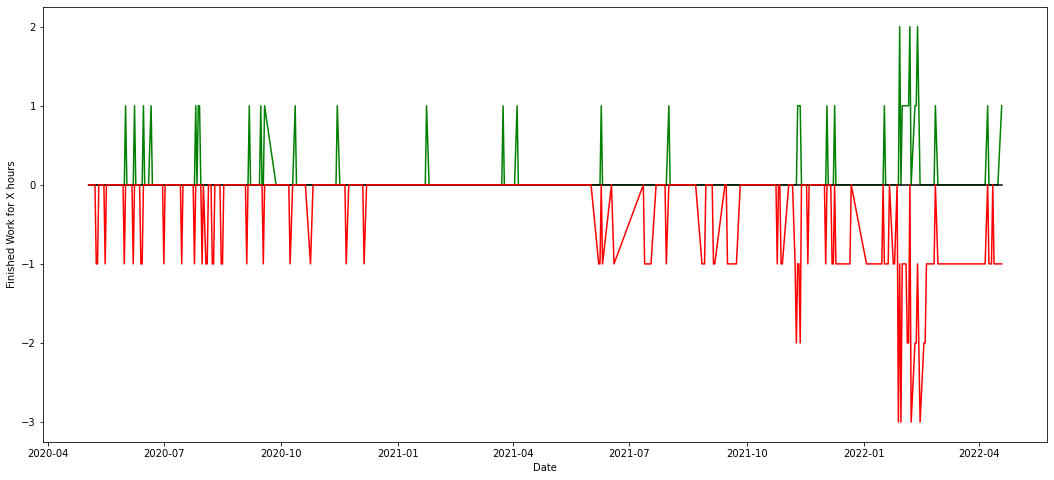

In [33]:
# Plot for working for a specific amount of time
plt.figure(figsize=(18, 8))
sns.lineplot(x = tasks_per_day_for_graphs['Date'], y = tasks_per_day_for_graphs['Finished Work for X hours'], color='green')
plt.plot(tasks_per_day_for_graphs['Date'], [0] * tasks_per_day_for_graphs.shape[0], color='black')
sns.lineplot(x = tasks_per_day_for_graphs['Date'], y = tasks_per_day_for_graphs['Unfinished Work for X hours'], color='red')
plt.savefig(folder_name + "\FinishedVsUnfinishedWorkForXHours.png", bbox_inches='tight')

<AxesSubplot:>

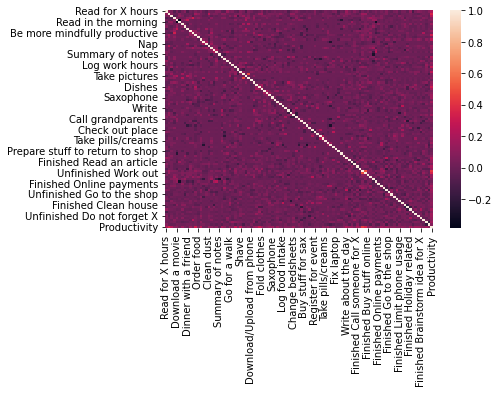

In [34]:
# Heatmap for numerical values (see if any of them correlates with any other)
sns.heatmap(tasks_per_day.corr())

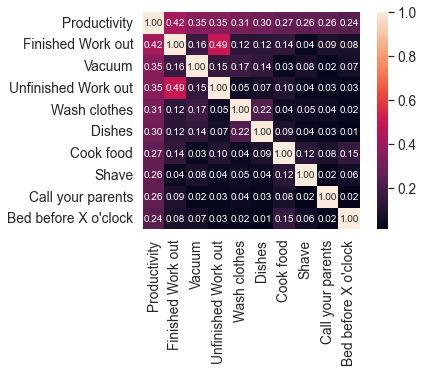

In [35]:
# Get attributes most correlated to productivity
k = 10
cols = tasks_per_day.corr().nlargest(k, 'Productivity')['Productivity'].index
cm = np.corrcoef(tasks_per_day[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.savefig(folder_name + "\ProductivityHeatmap.png", bbox_inches='tight')

In [36]:
# Get attributes most correlated to each other (negatively or positively)
correlation_dataframe = tasks_per_day.corr().unstack().sort_values(ascending=False)
correlation_dataframe = correlation_dataframe[(abs(correlation_dataframe) > 0.3) & (correlation_dataframe < 1)].drop_duplicates()
correlation_dataframe = pd.DataFrame(correlation_dataframe)

dfi.export(correlation_dataframe, folder_name + "\MostCorrelatedTasks.png")
correlation_dataframe

0
Finished Work out            Unfinished Work out         0.491650
Fix clothes storage          Change water filter         0.445731
Productivity                 Finished Work out           0.417938
                             Vacuum                      0.347360
                             Unfinished Work out         0.346675
Be more mindfully productive Download an app             0.326314
Productivity                 Wash clothes                0.314243
Dishes                       Productivity                0.300325
Read in the morning          Unfinished Psychology work -0.313268
                             Download a movie           -0.383682

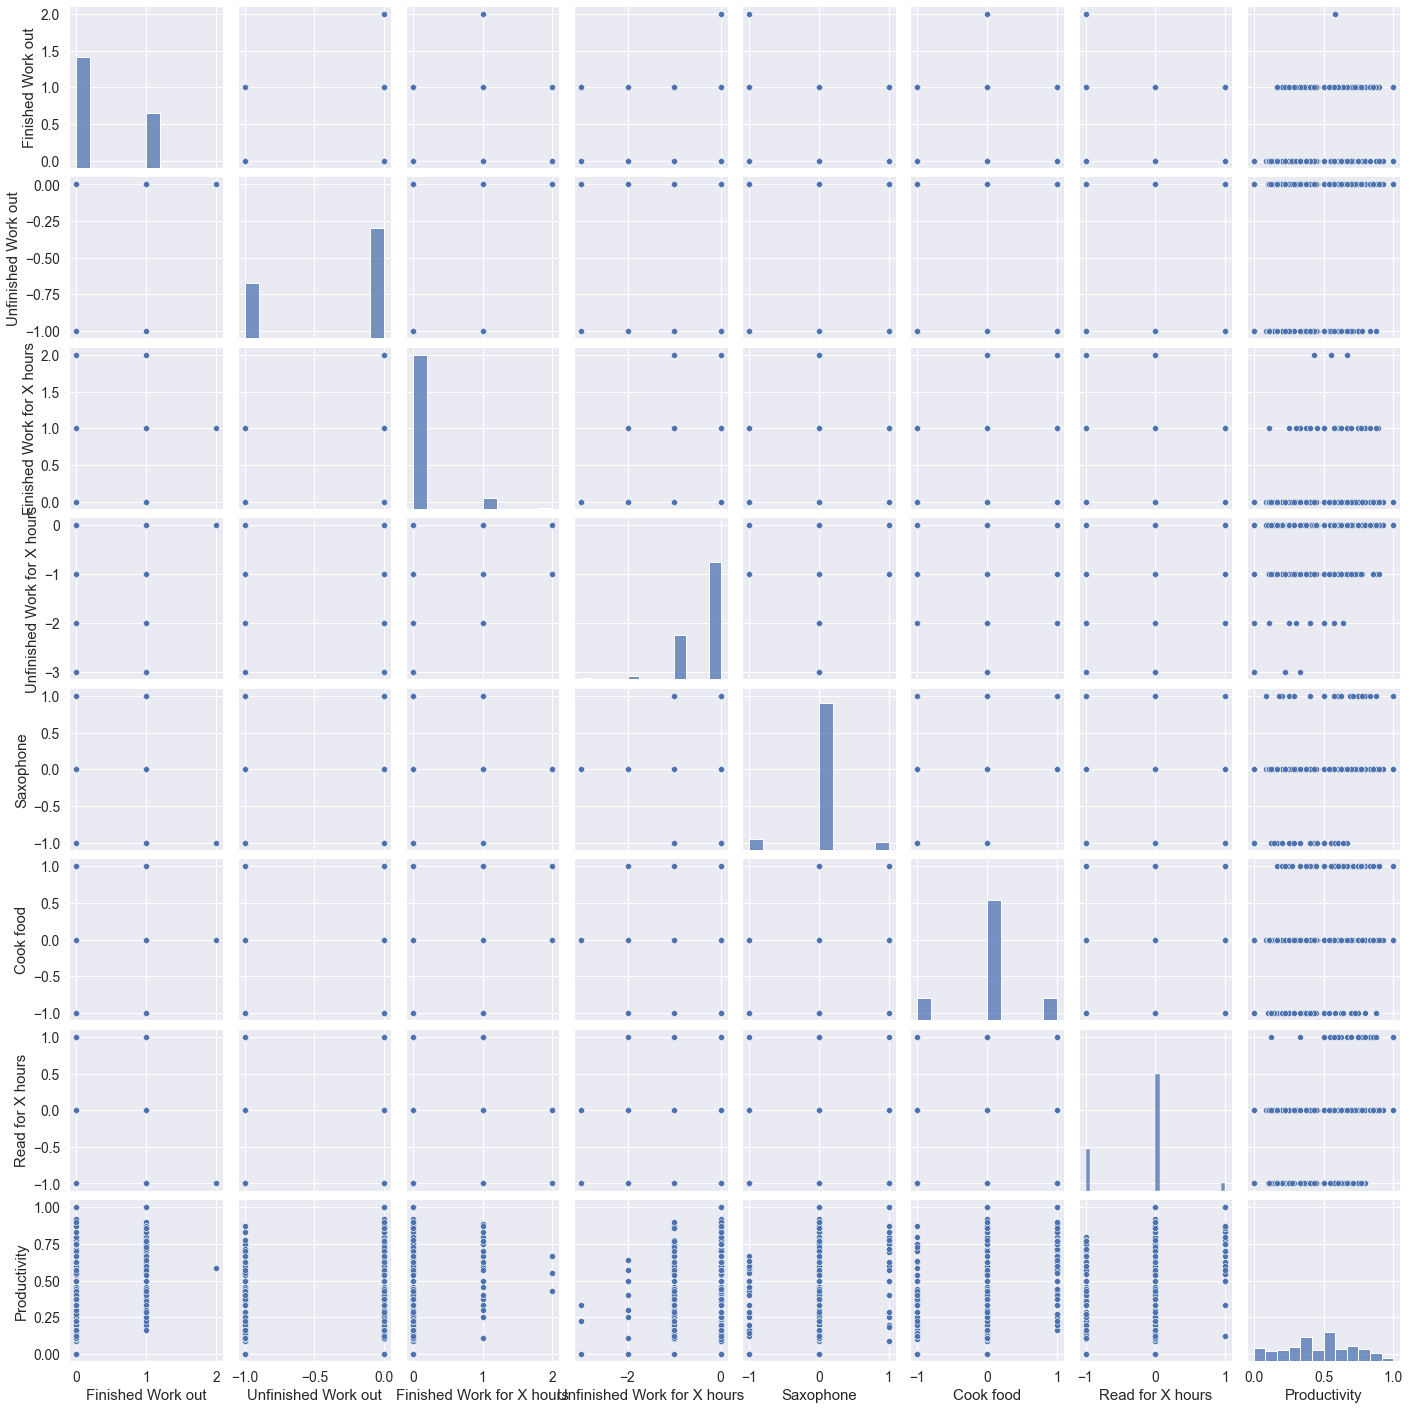

In [37]:
# Pair plots for most important variables
sns.pairplot(data = tasks_per_day, vars = ['Finished Work out', 'Unfinished Work out', 
                                           'Finished Work for X hours', 'Unfinished Work for X hours', 
                                          'Saxophone', 'Cook food', 'Read for X hours', 'Productivity'], 
             kind = 'scatter')

# These graphs do not seem helpful. Well, at least we tried. 
# However, what this made me think of is let's see the correlation matrix (and perhaps plot it) between these variables

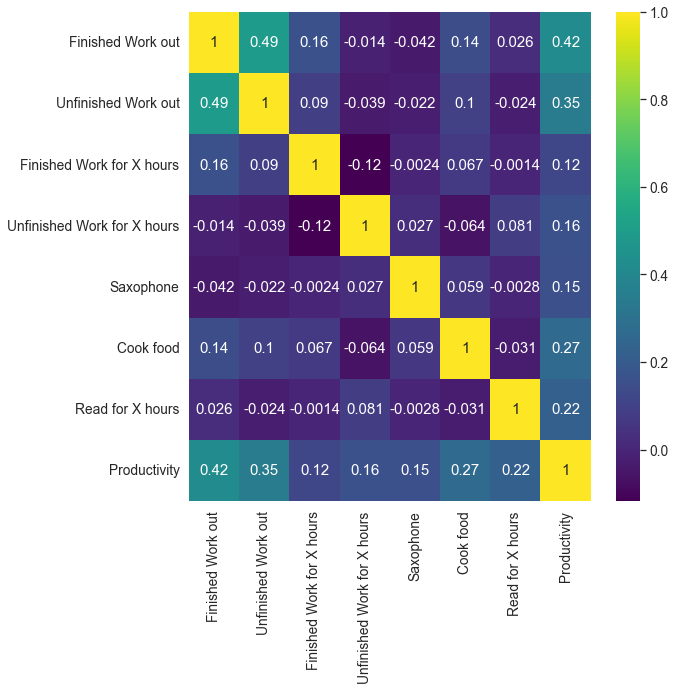

In [39]:
corr_matrix = tasks_per_day[['Finished Work out', 'Unfinished Work out', 
                                           'Finished Work for X hours', 'Unfinished Work for X hours', 
                                          'Saxophone', 'Cook food', 'Read for X hours', 'Productivity']].corr()
plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, annot=True, linecolor='white', cmap='viridis')

plt.savefig(folder_name + "\MostImportantTasksHeatmap.png", bbox_inches='tight')

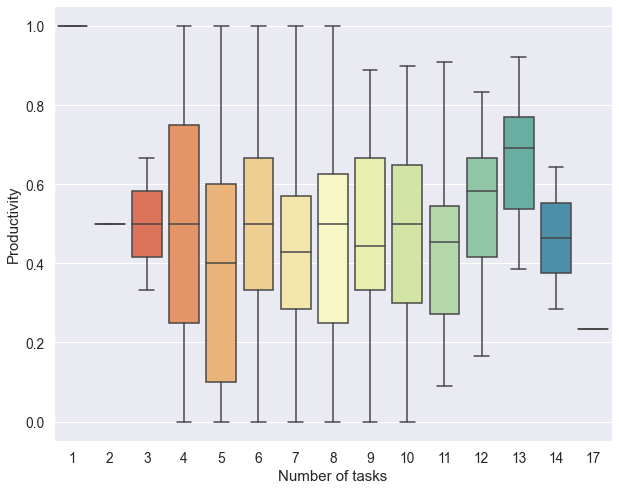

In [52]:
# Number of tasks per day and plot it against productivity
plt.figure(figsize=(10,8))
number_of_tasks = pd.Series(tasks_per_day.drop(columns='Productivity').abs().sum(axis=1), name="Number of tasks")
sns.boxplot(x = number_of_tasks, y = tasks_per_day['Productivity'], palette='Spectral')

plt.savefig(folder_name + "\ProductivityVsNumberOfTotalTasks.png", bbox_inches='tight')

In [45]:
# Define categories: quick, get_out_of_house, work, reading, organizing, talk_to_people etc.
# and for each plot boxplots with success rate to see which activities you are most likely to do
quick_category = ["Prepare stuff to return to shop", "Brainstorm idea for X", "Write about the day",
                 "Hair products check", "Take pills/creams", "Write how you feel", "Order in your room", "Clean dust",
                 "No computer games", "Order food", "Pay flat living costs", "Limit phone usage",
                 "Shave", "Check if you need to buy X", "Online payments",
                 "Dishes", "Change bedsheets", "Wash clothes", "Vacuum", "Register for event", "Do not forget X", 
                  "Fold clothes", "Write about the day before", "Romantic life", "Nails", "Send water index", 
                  "Unfreeze chicken", "Download a movie", "Change water filter", "Download an app"]
get_out_of_house = ["Check out place", "Buy stuff for sax", "Go to the pharmacy", "Go out for administrative stuff", 
                   "Go for a walk", "Take out trash", "Go to the shop", "Go to the ATM", "Dinner with a friend",
                   "Saxophone"]
work_related = ["Work for X hours", "DO X for work", "Log work hours", "Update CV", "Update goals"]
self_improvement = ["Learn for sax", "Self-authoring", "Psychology work", "Build workout routine", "Log food intake",
                   "Summary of notes", "Monitor diet", "Back exercises", "Work out"]
talk_to_people = ["Discuss spent money of common utilities", "Call someone for X", "Call grandparents", "Call a friend",
                 "Call your parents"]
reading = ["Read an article", "Read in the morning", "Read for X hours"]
organizing = ["Bed before X o'clock", "Wake up at X", "Enjoy your day", "No sweets", "Meditate", "Watch a movie", "Nap",
             "Take pictures", "Cook food", "Clean house", "Fix stuff around house", "Fix clothes storage", 
              "Be more mindfully productive"]
mental_work = ["Buy stuff online", "Holiday related", "Write", "Pick photos", "Improv Related", "Build X"]
computer_work = ["Fix laptop", "Download/Upload from phone", "Backup phone/laptop data", "Reinstall windows"]

category_productivity['Category'] = 'Other'
# Check if category lists got the same amount of entries as total tasks (85)
len(quick_category) + len(get_out_of_house) + len(work_related) + len(self_improvement) + len(talk_to_people) + len(reading) + len(organizing) + len(mental_work) + len(computer_work)

85

In [42]:
def add_category_to_dataframe(dataframe, list_of_categories, list_of_category_names):
    for category_values, category_name in zip(list_of_categories, list_of_category_names):
        dataframe.loc[dataframe.index.isin(category_values), 'Category'] = category_name

In [46]:
add_category_to_dataframe(category_productivity, [quick_category, get_out_of_house, work_related, self_improvement, 
                                                  talk_to_people, reading, organizing, mental_work, computer_work],
                         ["Quick", "Get out of house", "Work related", "Self improvement", "Talk to people", "Reading",
                         "Organizing", "Mental work", "Computer work"])
category_productivity.head(10)

,Total Unfinished,Total Finished,Productivity percent,Category
Read for X hours,121,23,0.159722,Reading
Read an article,56,30,0.348837,Reading
Vacuum,38,74,0.660714,Quick
Bed before X o'clock,78,14,0.152174,Organizing
Download an app,10,7,0.411765,Quick
Download a movie,1,6,0.857143,Quick
Read in the morning,0,1,1.000000,Reading
Pay flat living costs,16,17,0.515152,Quick
Enjoy your day,0,7,1.000000,Organizing
Call someone for X,111,89,0.445000,Talk to people


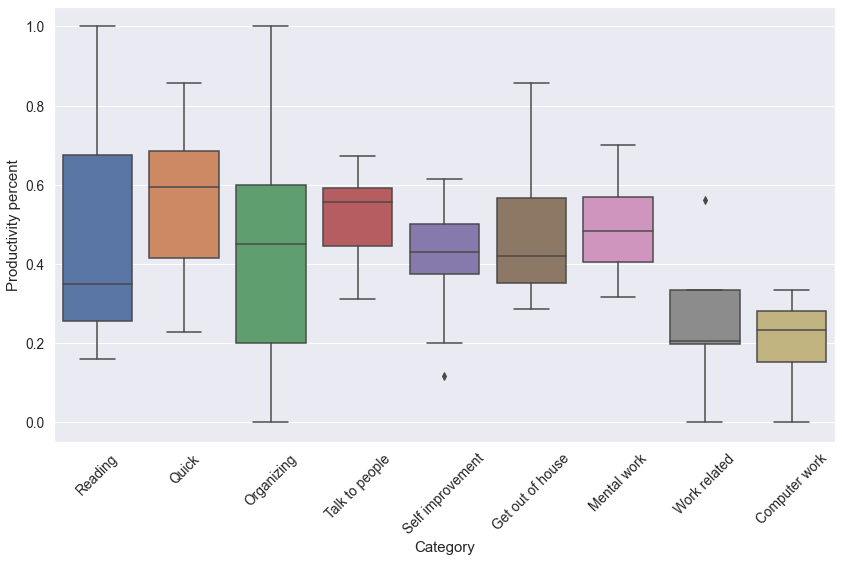

In [48]:
ax = plt.figure(figsize=(14,8)).gca()
sns.boxplot(data = category_productivity, x = 'Category', y = 'Productivity percent', ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.savefig(folder_name + "\ProductivityPerCategory.png", bbox_inches='tight')

### 4. Conclusion

After creating all these statistics and visualizations, I will look through all of them and draw some conclusions. I will do this as a presentation to myself.
The conclusions of the presentation will be written here as well. Besides all the conclusions, I will also answer the questions I had when I started this notebook.

##### Presentation conclusions:

- Start with one of the tasks I want to do recurrently and try to do it (almost) every day
- See if you can have 1 “work out” task every day since it looks like it correlated highly with productivity
- Set up some dates in which to focus firstly and mostly on doing one certain task
- Be more aware of the time you have in a day and plan accordingly
- Check out my “to do” list more often
- Have a weekly sheet to computer task when I transcribe all these lists so it will be always kind of updated
- Having more tasks in a day does not necessarily guarantee more success, but it guarantees a similar success as in other days, therefore it means that more will get done

##### What have I learnt?

I have learnt about my plans and what I am most focused right now and what I was focused on in the past. I now also know that I have been doing poor planning on many of the tasks I deemed important.
It was also interesting to see how tasks that involved talking to other people were done quite consistently.

##### What kind of insights did this project give me into my own schedule? 

The fact that I have some kind of schedule in my life makes it ok. But having actually seen it described to me in this way has made me more conscious of what I actually want to accomplish in this part of my life. This will lead to some thinking and better organizing, because at this point I am only doing 44% of the tasks I set up to do each day (on average).

##### What am I going to do with this information?

I have actually answered this question at the [presentation conclusions part](/#Presentation conclusions)